In [81]:
import sys
sys.path.append('/home/yvonne/Desktop/docking_result')

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
from PLI import SA
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [83]:
!pwd

/home/yvonne/Desktop/docking_result/5.dna_pli


In [84]:
#input frame number
frame_n = input()
root_folder = "/home/yvonne/Desktop/docking_result/5.dna_pli/"

 guanA


In [85]:
h5folder_file = f"{frame_n}_pli/" + f"score.h5"
h5_file = os.path.join(root_folder,h5folder_file)

In [86]:
store = pd.HDFStore(h5_file,"r")
store

<class 'pandas.io.pytables.HDFStore'>
File path: /home/yvonne/Desktop/docking_result/5.dna_pli/guanA_pli/score.h5

In [87]:
total_score = SA.ScoreAnalysis(store)
# total_score[-1].head()
total_score[-1].to_csv(root_folder + f"{frame_n}_pli/h5_{frame_n}.csv",index=True)

/home/yvonne/miniconda3/envs/edaf/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


## alter csv to plot

In [26]:
df = pd.read_csv(root_folder + f"{frame_n}_pli/h5_{frame_n}.csv")
df = df.set_index('resname')
df = df.loc[(df !=0).any(1)]
df = df.reset_index()
df.to_csv(root_folder + f"{frame_n}_pli/h5_{frame_n}.csv",index=False)

In [27]:
df2 = pd.read_csv(root_folder + f"{frame_n}_pli/h5_{frame_n}.csv")
df2

,resname,"g_dnaa.pdb,1"
0,TRXB/13/LEU,-0.034318
1,TRXB/14/ASP,1.231397
2,TRXB/15/LEU,-0.298947
3,TRXB/16/GLU,0.631838
4,TRXB/17/ALA,-0.262305
5,TRXB/18/THR,-0.076799
6,TRXB/19/GLY,-0.004851
7,TRXB/20/LEU,-0.222068
8,TRXB/21/PRO,-0.137074
9,TRXB/28/ALA,-0.012275


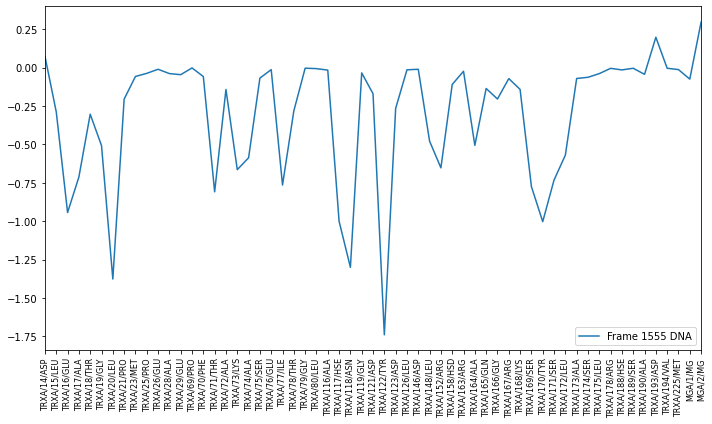

In [19]:
#plot all the drugs on x-axis(residue) with multiple lines
fig = plt.figure(figsize=(10,6))

plt.plot(df2['resname'], df2[f'{frame_n}dna,1'], label=f"Frame {frame_n} DNA")
plt.xticks(rotation=90, fontsize = 8)
plt.legend(loc=4)  #bbox_to_anchor把Ybox移到外面（x,y）,loc=0(best)/1(upright)/3(lowleft)
plt.xlim("TRXA/14/ASP","MGA/2/MG")  
# plt.grid() #輔助線

plt.tight_layout()
plt.savefig(root_folder + f"frame{frame_n}/total_score_{frame_n}.png")
plt.show()

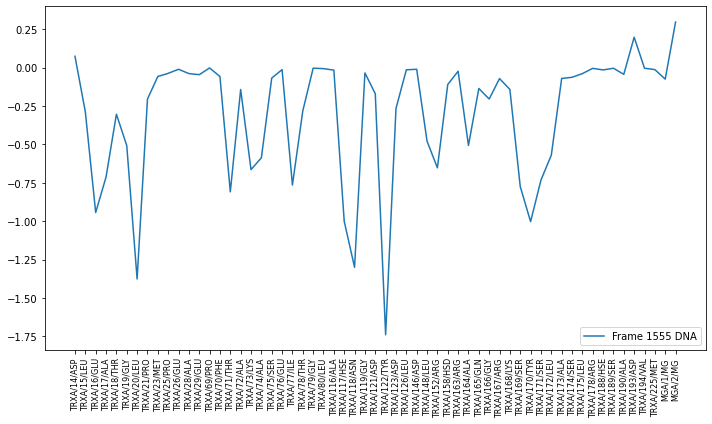

In [22]:
#plot all the drugs on x-axis(residue) with multiple lines
fig = plt.figure(figsize=(10,6))

for col in df2.columns:
    if not col == 'resname':
        plt.plot(df2['resname'], df2[col], label=f"Frame {frame_n} DNA")
plt.xticks(rotation=90, fontsize = 8)
plt.legend(loc=4)  #bbox_to_anchor把Ybox移到外面（x,y）,loc=0(best)/1(upright)/3(lowleft)
# plt.xlim("TRXA/13/LEU","MGA/2/MG")
# plt.grid() #輔助線

plt.tight_layout()
# plt.savefig(root_folder + f"frame{frame_n}/total_score_{frame_n}.png")
plt.show()

### 